In [41]:
import cdt #causal discovery toolbox
import networkx as nx
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

cdt.SETTINGS.rpath = r"C:\Program Files\R\R-4.4.3\bin\Rscript"

###set R_HOME dynamically
import os
os.environ['R_HOME'] = r'C:\Program Files\R\R-4.4.3' #for my case

###set R bin
os.environ['path'] += r'C:\Program Files\R\R-4.4.3\bin\x64;' #for my case
###loading the rpy2 library 
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [42]:
# All ALREDAY LOADED
#%%R 
#system("apt-get install -t buster-cran40 r-base -y --allow-unauthenticated")
#system("apt-get install libssl-dev -y")
#system("apt-get install libgmp3-dev  -y --allow-unauthenticated")
#system("apt-get install git -y")
#system("apt-get install build-essential  -y --allow-unauthenticated")
#system("apt-get install libv8-dev  -y --allow-unauthenticated")
#system("apt-get install libcurl4-openssl-dev -y --allow-unauthenticated")
#system("apt-get install libgsl-dev -y")
#system("apt-get install libxml2-dev -y --allow-unauthenticated")
#system("apt-get install libharfbuzz-dev libfribidi-dev libfontconfig1-dev libfreetype6-dev libpng-dev libtiff5-dev libjpeg-dev -y --allow-unauthenticated")
#install.packages(c("usethis", "shiny"), repos="http://cran.irsn.fr", Ncpus=4)
#install.packages(c("Rcpp"), repos="http://cran.irsn.fr", Ncpus=4)
#install.packages(c("V8"), repos="http://cran.irsn.fr", Ncpus=4)
#install.packages(c("sfsmisc"), repos="http://cran.irsn.fr", Ncpus=4)
#install.packages(c("clue"), repos="http://cran.irsn.fr", Ncpus=4)
#install.packages("https://cran.irsn.fr/src/contrib/Archive/randomForest/randomForest_4.6-14.tar.gz", repos=NULL, type="source", Ncpus=4)
#install.packages(c("lattice"), repos="http://cran.irsn.fr", Ncpus=4)
#install.packages(c("devtools"), repos="http://cran.irsn.fr", Ncpus=4)
#install.packages(c("MASS"), repos="http://cran.irsn.fr", Ncpus=4)
#install.packages("BiocManager", repos="http://cran.irsn.fr", Ncpus=4)
#install.packages("https://cran.irsn.fr/src/contrib/Archive/fastICA/fastICA_1.2-2.tar.gz", repos=NULL, type="source", Ncpus=4)
#BiocManager::install(c("bnlearn", "pcalg", "kpcalg", "glmnet", "mboost"), Ncpus=4)


In [43]:
### LOADED THIS
#%%R
#if (!require("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")
#
#BiocManager::install("graph")

In [44]:
### Loaded this
#%%R
#BiocManager::install("Bioconductor/RBGL", ref="avoid-Rdefines")

In [45]:
### Loaded ok
#%%R
#library(devtools)
#install_github(“cran/CAM”)
#install_github(“cran/momentchi2”)
#install.packages(“https://cran.rproject.org/src/contrib/Archive/sparsebn/sarsebn_0.1.2.tar.gz", repos=NULL, type=”source”)

In [46]:
### DO THIS TO TEST WHETHER ALL PIECES FOR KPCALG ARE INSTALLED
#%%R
# test.R 
#library('kpcalg')

In [47]:
### DO THIS TO TEST WHETHER ALL PIECES FOR RCIT ARE INSTALLED
#%%R
#library(RCIT)
#RCIT(rnorm(1000),rnorm(1000),rnorm(1000))
#RCoT(rnorm(1000),rnorm(1000),rnorm(1000))

In [48]:
df = pd.read_pickle("df_causal_discovery.p")
df.head()

,age,hours-per-week,hasGraduateDegree,inRelationship,isWhite,isFemale,greaterThan50k
0,39,40,0,0,1,0,0
1,50,13,0,1,1,0,0
2,38,40,0,0,1,0,0
3,53,40,0,1,0,0,0
5,37,40,1,0,1,1,0


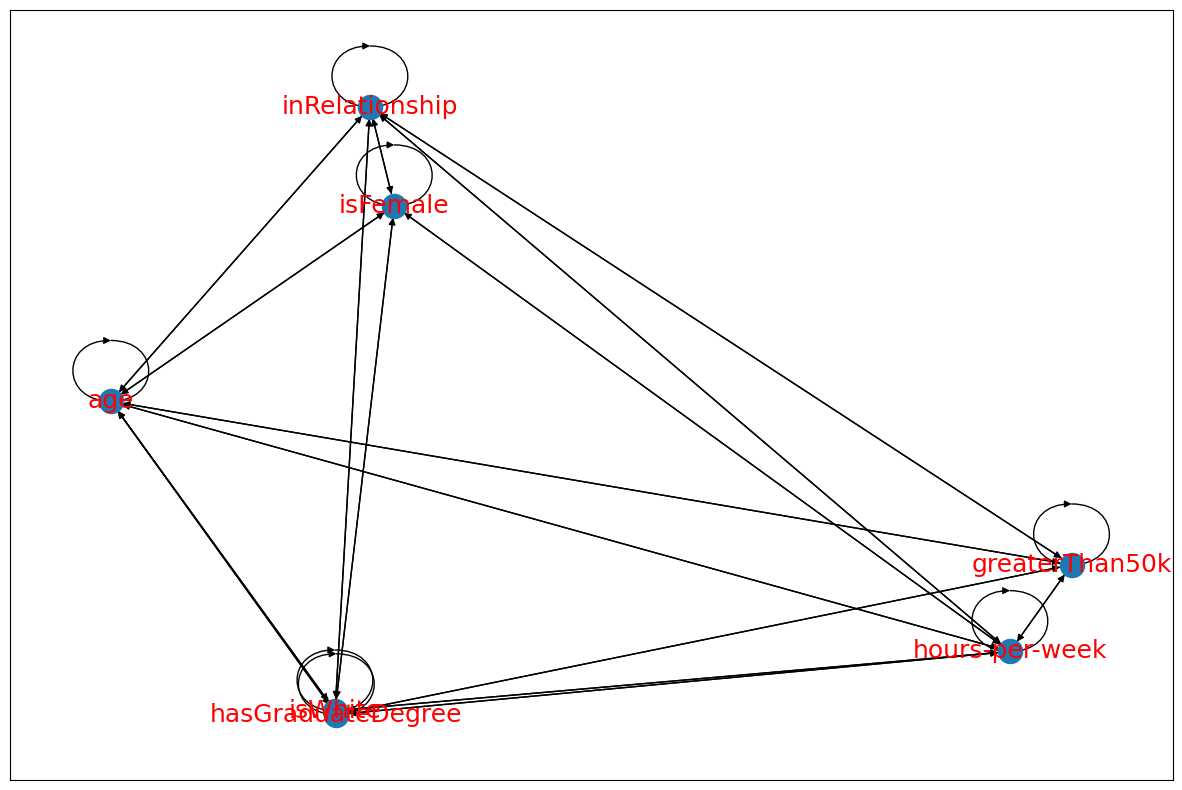

In [56]:
# Get skeleton using lasso
# initialize graph lasso
glasso = cdt.independence.graph.Glasso()

# apply graph lasso to dataset
skeleton = glasso.predict(df)

# visualize network
fig = plt.figure(figsize=(15,10))
nx.draw_networkx(skeleton, font_size=18, font_color='r')

## Use causal dicovery to get causal model

PC is ran on the skeleton of the given graph.


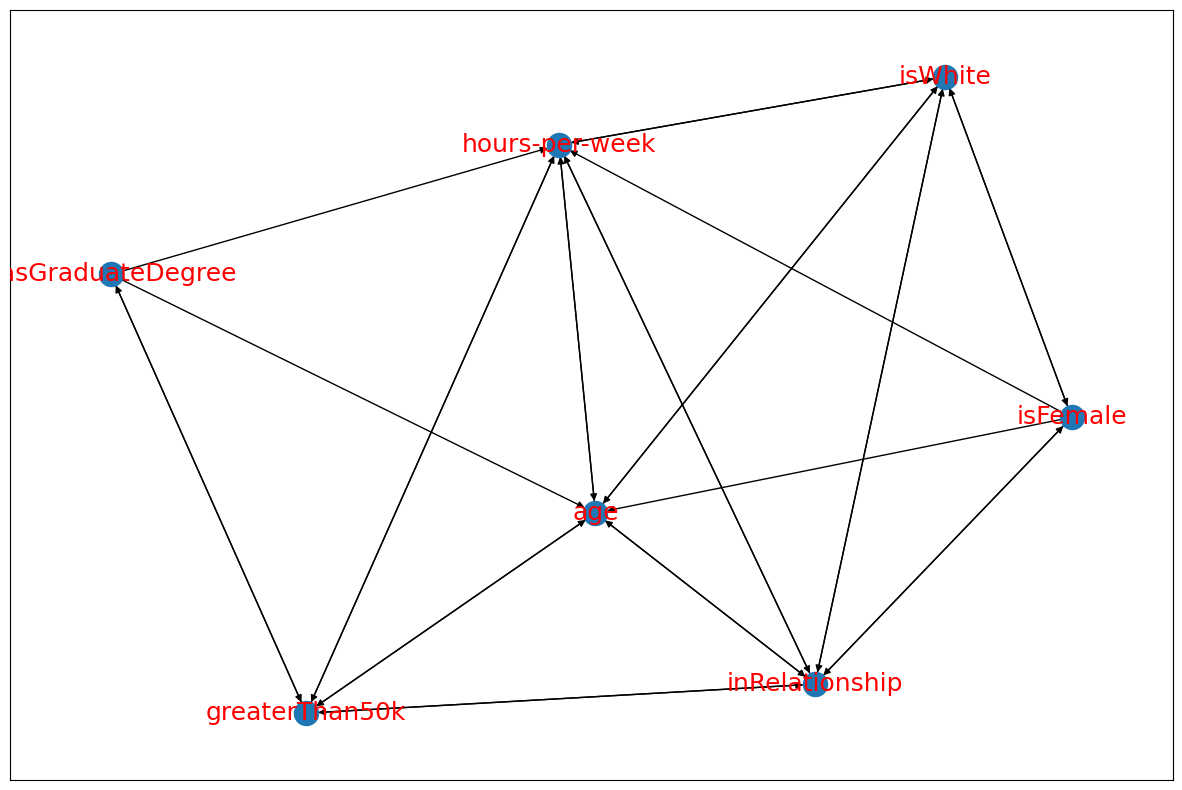

In [57]:
# PC

### THIS DOES NOT WORK CANNOT GET R TO WORK
### INSTALLING R PACKAGES DOES NOT WORK DUE TO SOME FOLDER PERMISSION ERROR IN MY WINDOWS
### CANNOT GET THE PERMISSIONS TO CHANGE

model_pc = cdt.causality.graph.PC()
graph_pc = model_pc.predict(df, skeleton)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_pc, font_size=18, font_color='r')

# get adjaceny matrix of PC graph
A_pc = nx.adjacency_matrix(graph_pc).todense()


### GES

GES is ran on the skeleton of the given graph.


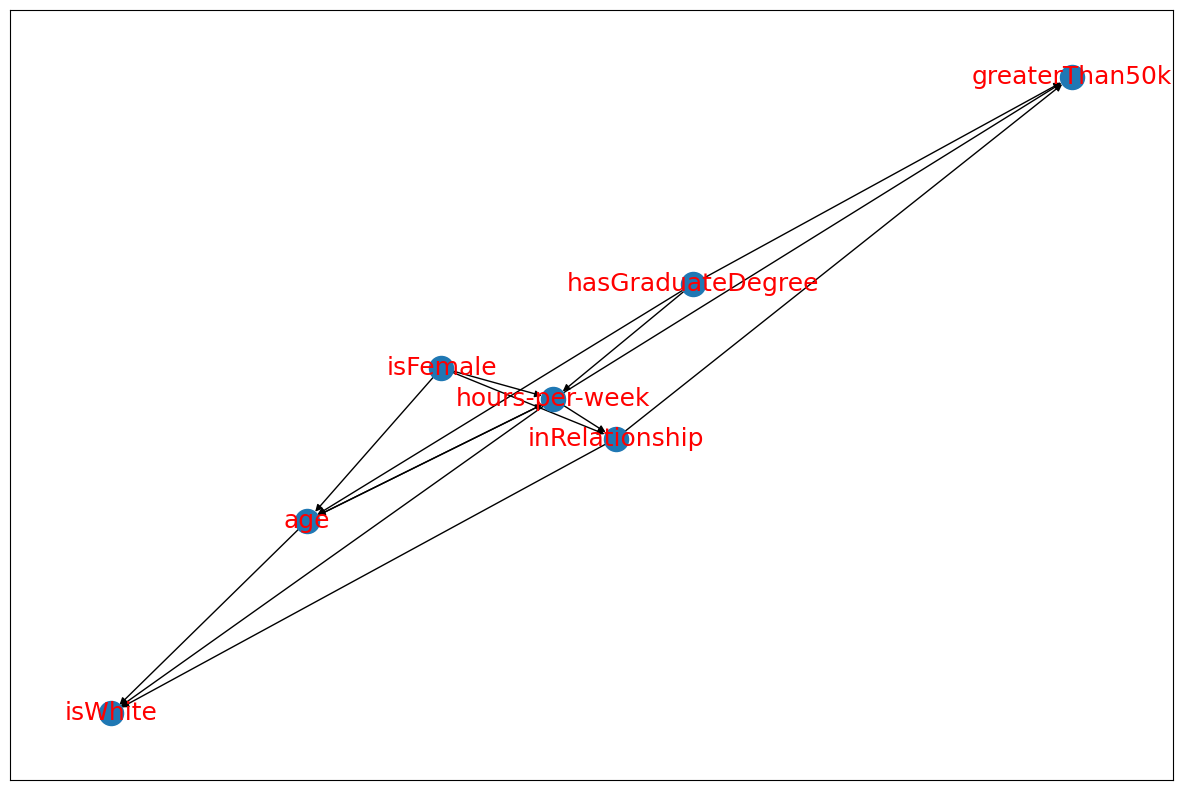

In [59]:
# initialize causal discovery model
model_ges = cdt.causality.graph.GES()

#apply causal discovery model to data nd skeleton
graph_ges = model_ges.predict(df, skeleton)

# visualize the skeleton
fig = plt.figure(figsize=(15,10))
nx.draw_networkx(graph_ges, font_size=18, font_color='r')

#get adjacency matrix of GES graph
A_ges = nx.adjacency_matrix(graph_ges).todense()

### GIES

GIES is ran on the skeleton of the given graph.


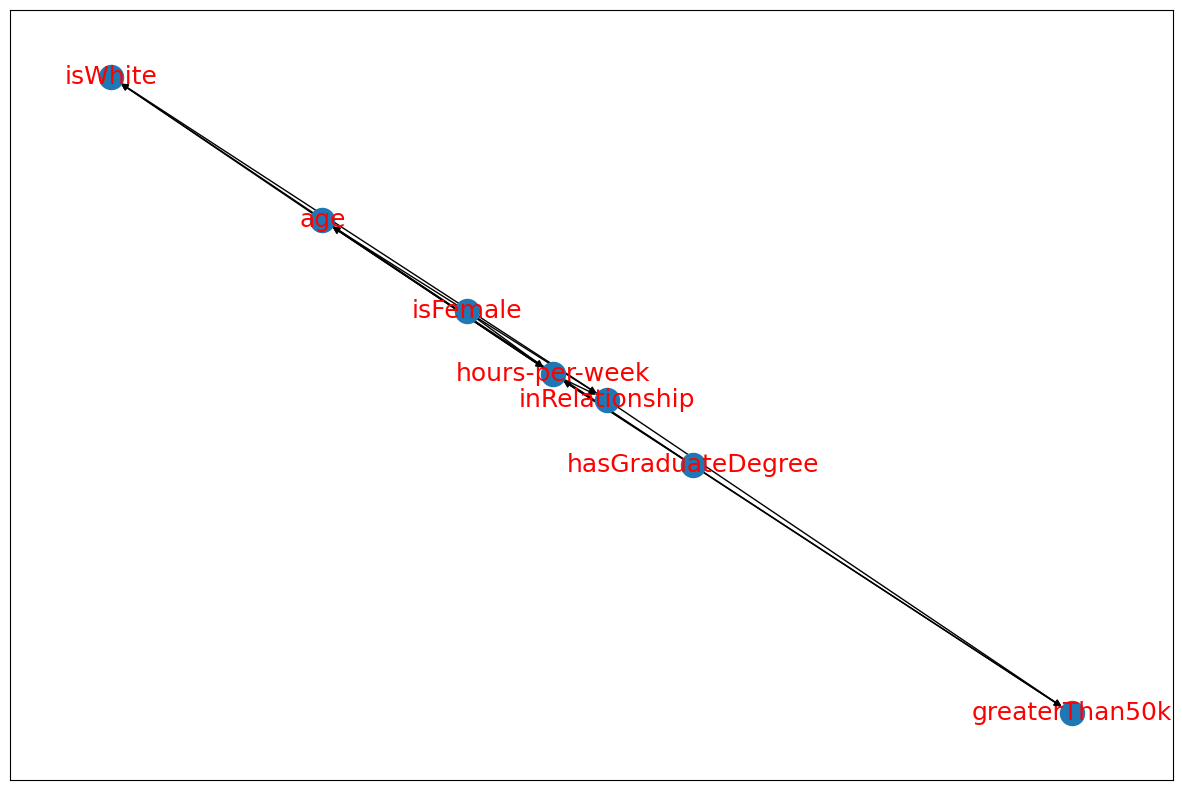

In [54]:
model_gies = cdt.causality.graph.GIES()
graph_gies = model_gies.predict(df, skeleton)

#visualize network
fig = plt.figure(figsize=(15,10))
nx.draw_networkx(graph_gies, font_size=18, font_color='r')

#get adjacency matrix of GIES graph
A_gies = nx.adjacency_matrix(graph_gies).todense()

### LiNGAM

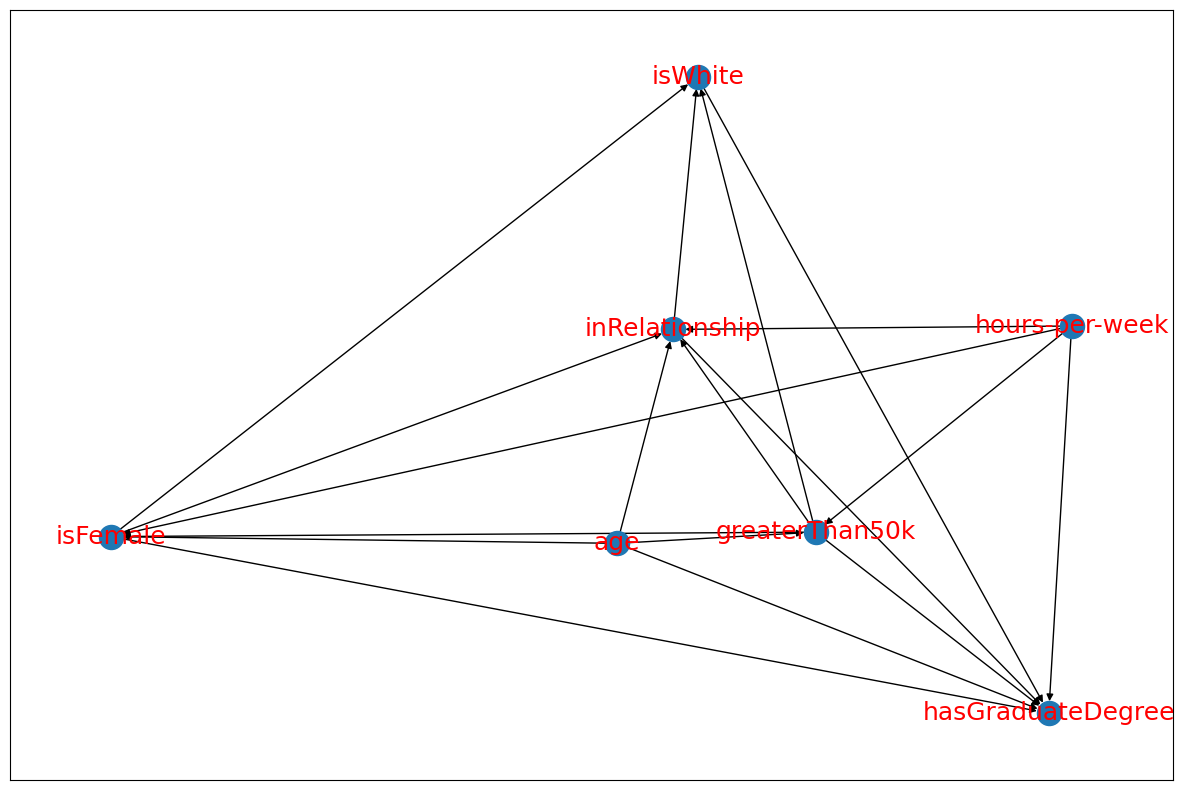

In [60]:
model_lingam = cdt.causality.graph.LiNGAM()
graph_lingam = model_lingam.predict(df)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_lingam, font_size=18, font_color='r')

# get adjaceny matrix of LiNGAM graph
A_lingam = nx.adjacency_matrix(graph_lingam).todense()